## Prac 07.1

In this homework, you are going to use the code from ```Traf\ficSignsClassification``` notebook and create your own traffic sign classifier.

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?


In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

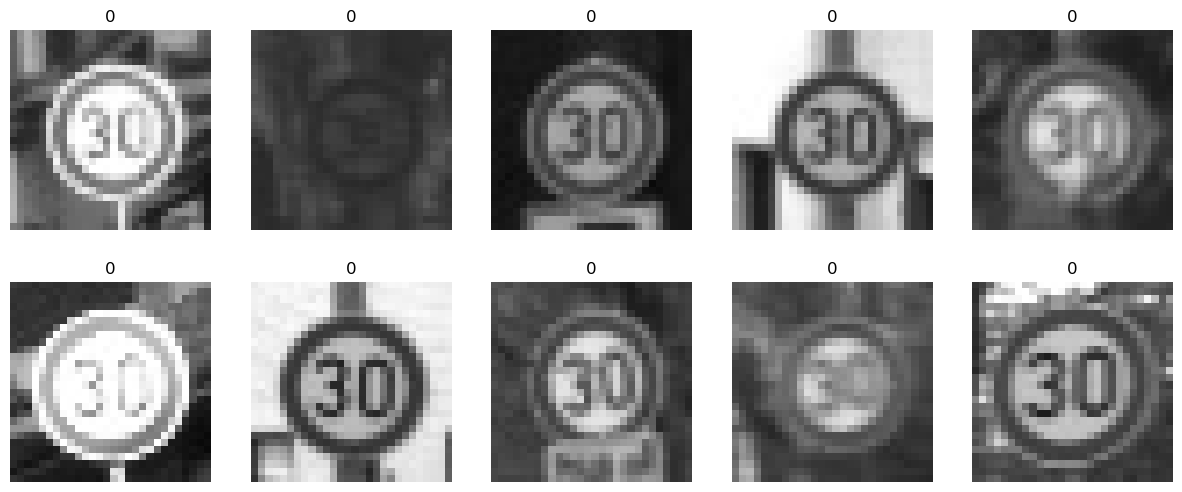

In [2]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

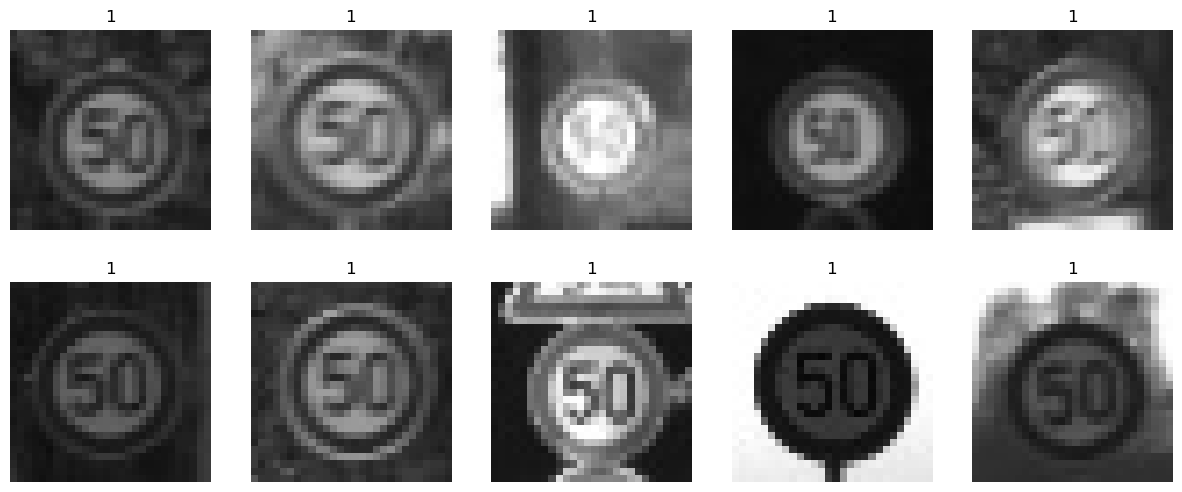

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.018000364303588867


In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input


model = Sequential()

# Add the input layer with 784 input features
model.add(Dense(10, activation='linear', input_shape=(pixels.shape[1],)))

# Add the output layer
model.add(Dense(1, activation='linear'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7861 (30.71 KB)
Trainable params: 7861 (30.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [9]:
history = model.fit(pixels, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


112/112 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.5573 - val_loss: 0.2993 - val_accuracy: 0.5906
Epoch 2/10
112/112 [==============================] - 0s 1ms/step - loss: 0.2072 - accuracy: 0.6966 - val_loss: 0.1825 - val_accuracy: 0.7181
Epoch 3/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.7861 - val_loss: 0.2486 - val_accuracy: 0.6779
Epoch 4/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.8294 - val_loss: 0.1544 - val_accuracy: 0.7785
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.8932 - val_loss: 0.1285 - val_accuracy: 0.8468
Epoch 6/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9038 - val_loss: 0.1044 - val_accuracy: 0.9094
Epoch 7/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.8842 - val_loss: 0.1117 - val_accuracy: 0.8870
Epoc

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

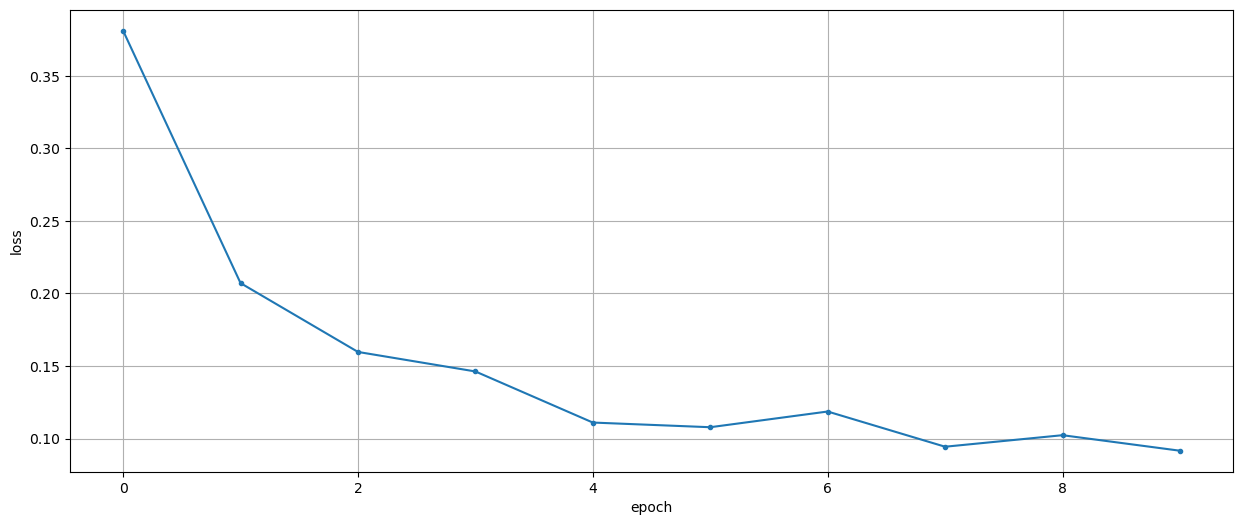

In [10]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [11]:
model2 = Sequential()

# Add the input layer with appropriate input features
model2.add(Dense(20, activation='relu', input_shape=(pixels.shape[1],)))
model2.add(Dense(20, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model2.add(Dense(1, activation='sigmoid'))

model2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 16141 (63.05 KB)
Trainable params: 16141 (63.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model2.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model2.fit(pixels, labels, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 1s 3ms/step - loss: 0.6370 - accuracy: 0.6429 - val_loss: 0.5888 - val_accuracy: 0.7170
Epoch 2/10
112/112 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7492 - val_loss: 0.5049 - val_accuracy: 0.7774
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7939 - val_loss: 0.4338 - val_accuracy: 0.8434
Epoch 4/10
112/112 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8644 - val_loss: 0.3901 - val_accuracy: 0.8501
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8764 - val_loss: 0.4066 - val_accuracy: 0.8110
Epoch 6/10
112/112 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.9013 - val_loss: 0.2881 - val_accuracy: 0.9049
Epoch 7/10
112/112 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.9301 - val_loss: 0.2903 - val_accuracy: 0.8893
Epoch 

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

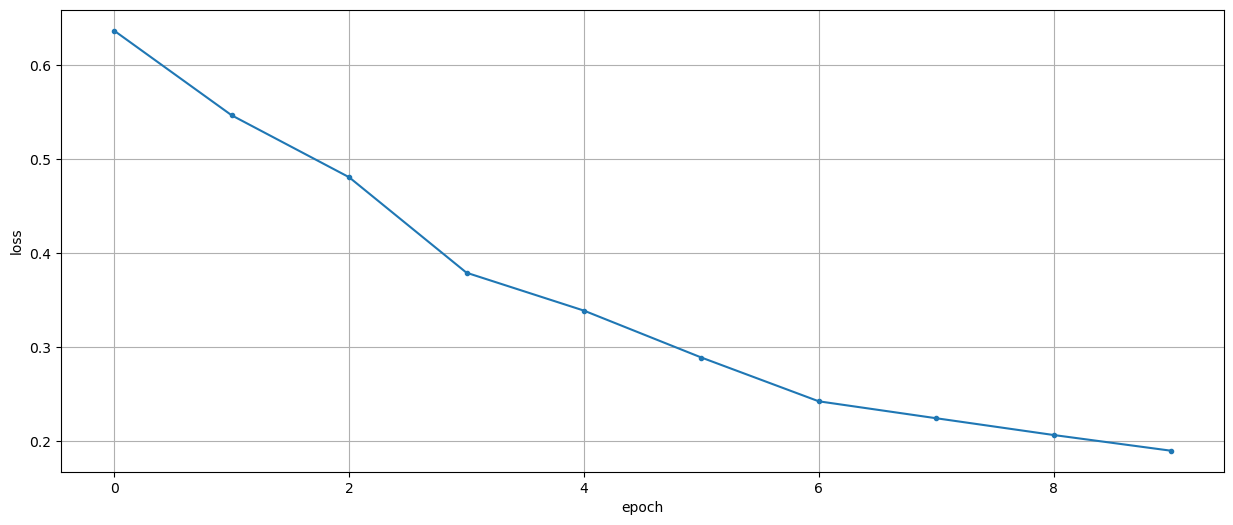

In [14]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')